# Brute-force rendering approach

This approach used bounded L-BFGS optimization to fit x/y tilt values and source flux parameters, re-rendering a model PSF in each case.

In [1]:
results_file = 'fit_results.txt'

In [2]:
import json
with open(results_file, 'r') as f:
    results = [json.loads(l) for l in f.readlines()]

In [3]:
# Pull out each of the fitted parameters into separate lists
dx, dy, df = zip(*[l['x'] for l in results])


In [4]:
import numpy as np
dr = [np.sqrt(x**2+y**2) for x,y in zip(dx,dy)]

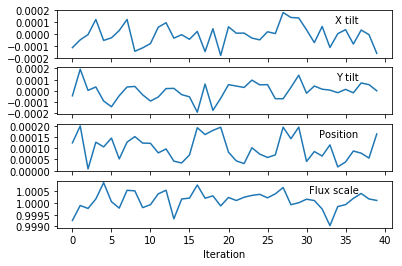

In [5]:
import matplotlib.pyplot as plt
import math

I = [i for i in range(len(results))]

f, axes = plt.subplots(4, sharex=True)
axes[0].plot(I, dx)
axes[0].text(.9,.9,'X tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[0].transAxes)
axes[0].locator_params(axis='y', nbins=6)
axes[1].plot(I, dy)
axes[1].text(.9,.9,'Y tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[1].transAxes)
axes[1].locator_params(axis='y', nbins=6)
axes[2].plot(I, dr)
axes[2].text(.9,.9,'Position',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[2].transAxes)
axes[2].locator_params(axis='y', nbins=6)
axes[3].plot(I, df)
axes[3].text(.9,.9,'Flux scale',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[3].transAxes)
axes[3].locator_params(axis='y', nbins=6)
axes[3].set_xlabel('Iteration')
plt.show()

In [6]:
from IPython.display import HTML, display
header = '<th>' + '</th><th>'.join(['(n={})'.format(len(results)),'mean', 's.d.', 's.e.']) + '</th>'
rows = ['<th>{}</th>'.format(label) + ''.join(
    ['<td>{:.2e}</td>'.format(s) for s in [np.mean(vals), np.std(vals), np.std(vals)/np.sqrt(len(vals))]]) for (label,vals) in [
        ('x tilx',dx),('y tilx',dy),('radius',dr),('flux',df)]]
rows.insert(0,header)

display(HTML(
    '<table><tr>{}</tr></table>'.format(
         '</tr><tr>'.join(rows)
        )
    ))

(n=40),mean,s.d.,s.e.
x tilx,-8.58e-06,8.66e-05,1.37e-05
y tilx,-2.30e-06,7.53e-05,1.19e-05
radius,1.01e-04,5.43e-05,8.59e-06
flux,1.00e+00,3.74e-04,5.92e-05


# Sub-pixel translation approach

This approach again used bounded L-BFGS optimization to fit x/y tilt values and source flux parameters, but used a FFT-based sub-pixel translation to shift a reference model image rather than re-rendering the whole PSF each time.

In [19]:
results_file = 'fit_results_subpix.txt'

In [20]:
import json
with open(results_file, 'r') as f:
    results = [json.loads(l) for l in f.readlines()]

In [21]:
# Pull out each of the fitted parameters into separate lists
dx, dy, df = zip(*[l['x'] for l in results])


In [22]:
import numpy as np
dr = [np.sqrt(x**2+y**2) for x,y in zip(dx,dy)]

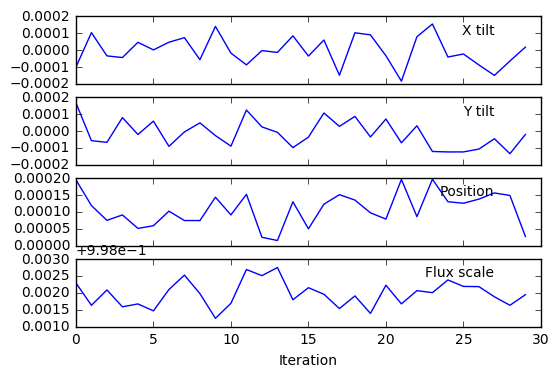

In [23]:
import matplotlib.pyplot as plt
import math

I = [i for i in range(len(results))]

f, axes = plt.subplots(4, sharex=True)
axes[0].plot(I, dx)
axes[0].text(.9,.9,'X tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[0].transAxes)
axes[0].locator_params(axis='y', nbins=6)
axes[1].plot(I, dy)
axes[1].text(.9,.9,'Y tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[1].transAxes)
axes[1].locator_params(axis='y', nbins=6)
axes[2].plot(I, dr)
axes[2].text(.9,.9,'Position',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[2].transAxes)
axes[2].locator_params(axis='y', nbins=6)
axes[3].plot(I, df)
axes[3].text(.9,.9,'Flux scale',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[3].transAxes)
axes[3].locator_params(axis='y', nbins=6)
axes[3].set_xlabel('Iteration')
plt.show()

In [24]:
from IPython.display import HTML, display
header = '<th>' + '</th><th>'.join(['(n={})'.format(len(results)),'mean', 's.d.', 's.e.']) + '</th>'
rows = ['<th>{}</th>'.format(label) + ''.join(
    ['<td>{:.2e}</td>'.format(s) for s in [np.mean(vals), np.std(vals), np.std(vals)/np.sqrt(len(vals))]]) for (label,vals) in [
        ('x tilx',dx),('y tilx',dy),('radius',dr),('flux',df)]]
rows.insert(0,header)

display(HTML(
    '<table><tr>{}</tr></table>'.format(
         '</tr><tr>'.join(rows)
        )
    ))

(n=30),mean,s.d.,s.e.
x tilx,-3.64e-06,8.56e-05,1.56e-05
y tilx,-1.49e-05,8.07e-05,1.47e-05
radius,1.08e-04,4.91e-05,8.96e-06
flux,1.00e+00,3.75e-04,6.85e-05


# Fitting without a spiral

In [7]:
results_file = 'fit_no_spiral_results.txt'

In [8]:
import json
with open(results_file, 'r') as f:
    results = [json.loads(l) for l in f.readlines()]

In [9]:
# Pull out each of the fitted parameters into separate lists
dx, dy, df = zip(*[l['x'] for l in results])


In [10]:
import numpy as np
dr = [np.sqrt(x**2+y**2) for x,y in zip(dx,dy)]

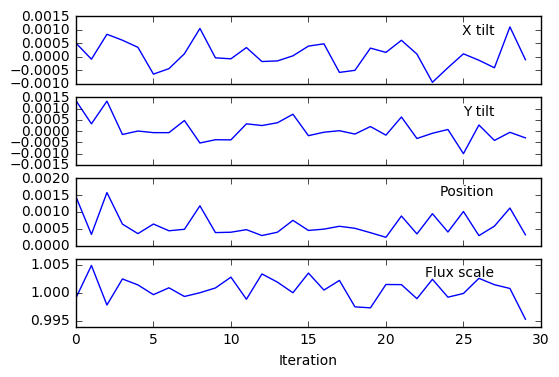

In [11]:
import matplotlib.pyplot as plt
import math

I = [i for i in range(len(results))]

f, axes = plt.subplots(4, sharex=True)
axes[0].plot(I, dx)
axes[0].text(.9,.9,'X tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[0].transAxes)
axes[0].locator_params(axis='y', nbins=6)
axes[1].plot(I, dy)
axes[1].text(.9,.9,'Y tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[1].transAxes)
axes[1].locator_params(axis='y', nbins=6)
axes[2].plot(I, dr)
axes[2].text(.9,.9,'Position',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[2].transAxes)
axes[2].locator_params(axis='y', nbins=6)
axes[3].plot(I, df)
axes[3].text(.9,.9,'Flux scale',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[3].transAxes)
axes[3].locator_params(axis='y', nbins=6)
axes[3].set_xlabel('Iteration')
plt.show()

In [12]:
from IPython.display import HTML, display
header = '<th>' + '</th><th>'.join(['(n={})'.format(len(results)),'mean', 's.d.', 's.e.']) + '</th>'
rows = ['<th>{}</th>'.format(label) + ''.join(
    ['<td>{:.2e}</td>'.format(s) for s in [np.mean(vals), np.std(vals), np.std(vals)/np.sqrt(len(vals))]]) for (label,vals) in [
        ('x tilx',dx),('y tilx',dy),('radius',dr),('flux',df)]]
rows.insert(0,header)

display(HTML(
    '<table><tr>{}</tr></table>'.format(
         '</tr><tr>'.join(rows)
        )
    ))

(n=30),mean,s.d.,s.e.
x tilx,8.73e-05,4.88e-04,8.92e-05
y tilx,6.57e-05,4.93e-04,9.00e-05
radius,6.12e-04,3.44e-04,6.29e-05
flux,1.00e+00,2.06e-03,3.76e-04


# Fitting of binary using cross-corelation and Bayesian optimisation

In [3]:
results_file = 'fit_results_xcorr_bo.txt'

In [4]:
import json
with open(results_file, 'r') as f:
    results = [json.loads(l) for l in f.readlines()]

In [5]:
import numpy as np
# Pull out each of the fitted parameters into separate lists
dx, dy, df,dx2, dy2, df2= zip(*[l['x'] for l in results])
dr = [np.sqrt((x-x2)**2+(y-y2)**2) for x,y,x2,y2 in zip(dx,dy,dx2,dy2)]

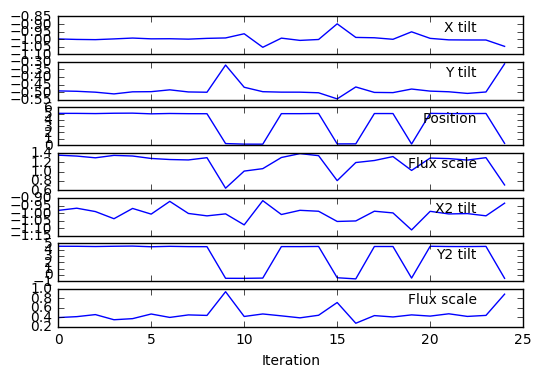

In [18]:
import matplotlib.pyplot as plt
import math

I = [i for i in range(len(results))]

f, axes = plt.subplots(7, sharex=True)
axes[0].plot(I, dx)
axes[0].text(.9,.9,'X tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[0].transAxes)
axes[0].locator_params(axis='y', nbins=6)
axes[1].plot(I, dy)
axes[1].text(.9,.9,'Y tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[1].transAxes)
axes[1].locator_params(axis='y', nbins=6)
axes[2].plot(I, dr)
axes[2].text(.9,.9,'Position',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[2].transAxes)
axes[2].locator_params(axis='y', nbins=6)
axes[3].plot(I, df)
axes[3].text(.9,.9,'Flux scale',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[3].transAxes)
axes[3].locator_params(axis='y', nbins=6)
axes[4].plot(I, dx2)
axes[4].text(.9,.9,'X2 tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[4].transAxes)
axes[4].locator_params(axis='y', nbins=6)
axes[5].plot(I, dy2)
axes[5].text(.9,.9,'Y2 tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[5].transAxes)
axes[5].locator_params(axis='y', nbins=6)
axes[6].plot(I, df2)
axes[6].text(.9,.9,'Flux scale',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[6].transAxes)
axes[6].locator_params(axis='y', nbins=6)
axes[6].set_xlabel('Iteration')
plt.show()

In [21]:
from IPython.display import HTML, display
header = '<th>' + '</th><th>'.join(['(n={})'.format(len(results)),'mean', 's.d.', 's.e.']) + '</th>'
rows = ['<th>{}</th>'.format(label) + ''.join(
    ['<td>{:.2e}</td>'.format(s) for s in [np.mean(vals), np.std(vals), np.std(vals)/np.sqrt(len(vals))]]) for (label,vals) in [
        ('x tilx',dx),('y tilx',dy),
        ('x2 tilx',dx2),('y2 tilx',dy2),
        ('radius',dr),('flux',df),('flux',df2)]]
rows.insert(0,header)

display(HTML(
    '<table><tr>{}</tr></table>'.format(
         '</tr><tr>'.join(rows)
        )
    ))

(n=25),mean,s.d.,s.e.
x tilx,-9.95e-01,2.77e-02,5.54e-03
y tilx,-4.83e-01,5.10e-02,1.02e-02
x2 tilx,-1.00e+00,4.32e-02,8.64e-03
y2 tilx,3.09e+00,2.27e+00,4.53e-01
radius,3.65e+00,2.16e+00,4.32e-01
flux,1.19e+00,1.98e-01,3.96e-02
flux,4.65e-01,1.49e-01,2.99e-02


## Exclude anomalies

In [22]:
import numpy as np
# Pull out each of the fitted parameters into separate lists
dx, dy, df,dx2, dy2, df2= zip(*[l['x'] for l in results if l['x'][4]>3])
dr = [np.sqrt((x-x2)**2+(y-y2)**2) for x,y,x2,y2 in zip(dx,dy,dx2,dy2)]

In [24]:
from IPython.display import HTML, display
header = '<th>' + '</th><th>'.join(['(n={})'.format(len(results)),'mean', 's.d.', 's.e.']) + '</th>'
rows = ['<th>{}</th>'.format(label) + ''.join(
    ['<td>{:.2e}</td>'.format(s) for s in [np.mean(vals), np.std(vals), np.std(vals)/np.sqrt(len(vals))]]) for (label,vals) in [
        ('x tilx',dx),('y tilx',dy),
        ('x2 tilx',dx2),('y2 tilx',dy2),
        ('radius',dr),('flux',df),('flux',df2)]]
rows.insert(0,header)

display(HTML(
    '<table><tr>{}</tr></table>'.format(
         '</tr><tr>'.join(rows)
        )
    ))

(n=25),mean,s.d.,s.e.
x tilx,-9.99e-01,4.82e-03,1.14e-03
y tilx,-4.99e-01,5.89e-03,1.39e-03
x2 tilx,-9.93e-01,2.42e-02,5.71e-03
y2 tilx,4.50e+00,2.79e-02,6.58e-03
radius,5.00e+00,2.72e-02,6.40e-03
flux,1.30e+00,3.92e-02,9.24e-03
flux,4.17e-01,3.27e-02,7.70e-03
